# Частотный анализ русского текста

## Загрузка данных

In [1]:
import nltk
f = open('dataset.txt', "r", encoding="utf-8")
text = f.read()

## Занижение регистра

In [2]:
text = text.lower()

## Удаление специальных символов и знаков препинания

In [3]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [4]:
spec_chars = string.punctuation + '\n\xa0«»\t—…:;' 

In [5]:
text = "".join([ch for ch in text if ch not in spec_chars])


In [6]:
def remove_chars_from_text(text, chars):
    return "".join([ch for ch in text if ch not in chars])

In [7]:
text = remove_chars_from_text(text, spec_chars)
text = remove_chars_from_text(text, string.digits)

## Токенизация

In [8]:
from nltk import word_tokenize
text_tokens = word_tokenize(text)

In [9]:
len(text_tokens)
text_tokens[:10]
import nltk
text = nltk.Text(text_tokens)

## Статистика без правок

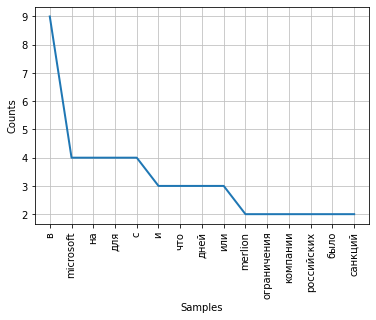

[('в', 9),
 ('microsoft', 4),
 ('на', 4),
 ('для', 4),
 ('с', 4),
 ('и', 3),
 ('что', 3),
 ('дней', 3),
 ('или', 3),
 ('merlion', 2)]

In [10]:
from nltk.probability import FreqDist
fdist = FreqDist(text)
fdist.plot(15,cumulative=False)
fdist = FreqDist(text)
fdist.most_common(10)

## Статистика без "шума"

In [11]:
from nltk.probability import FreqDist
fdist_sw = FreqDist(text)

In [12]:
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")

In [13]:
text_tokens = [token.strip() for token in text_tokens if token not in russian_stopwords]
text = nltk.Text(text_tokens)

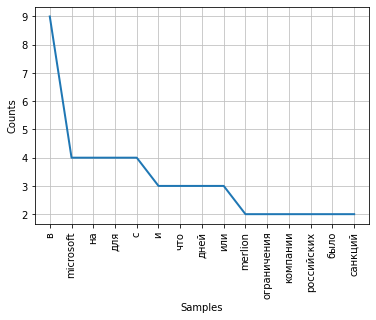

[('microsoft', 4),
 ('дней', 3),
 ('merlion', 2),
 ('ограничения', 2),
 ('компании', 2),
 ('российских', 2),
 ('санкций', 2),
 ('ноября', 2),
 ('течение', 2),
 ('сша', 2)]

In [14]:
fdist_sw.plot(15,cumulative=False)
fdist_sw = FreqDist(text)
fdist_sw.most_common(10)